In [59]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
import numpy as np

In [7]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [18]:
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [19]:
x = df.drop(["Purchased"], axis = 1)
y = df.Purchased

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
import sklearn

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lm = LogisticRegression()

In [25]:
model = lm.fit(xtrain, ytrain)

In [27]:
ytest_pred = lm.predict(xtest)
ytest_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [28]:
df1 = pd.DataFrame(ytest_pred, ytest)
print(df1)

           0
Purchased   
0          0
0          0
0          0
0          0
0          0
...       ..
0          0
0          1
0          0
1          1
1          1

[80 rows x 1 columns]


In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ytest_pred)
tn, fp, fn, tp = confusion_matrix(ytest, ytest_pred).ravel()
print('True Positive: ', tp)
print('True Negative: ', tn)
print('False Positive: ', fp)
print('False Negative: ', fn)

True Positive:  17
True Negative:  56
False Positive:  2
False Negative:  5


In [53]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print('Precision: ', precision_score(ytest, ytest_pred, average = 'binary'))
print('Recall: ', recall_score(ytest, ytest_pred, average = 'binary'))
print('Accuracy: ', accuracy_score(ytest, ytest_pred))
print('Error Rate: ', 1 - accuracy_score(ytest, ytest_pred))

Precision:  0.8947368421052632
Recall:  0.7727272727272727
Accuracy:  0.9125
Error Rate:  0.08750000000000002


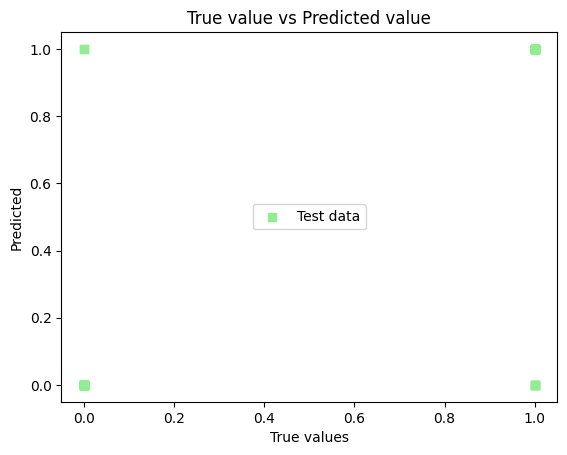

In [58]:
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'center')
#plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()